### Objetivo: Quantidade de reclamações por porte de operadoras de saúde na competência 2024. Spark, pyspark, pandas, matplot e numpy.


In [1]:
# Importando as bibliotecas
import pandas as pd
from pyspark.sql import SparkSession

In [2]:
# Criando o SparkSession
spark = SparkSession.builder.appName("spark-web").getOrCreate()

In [3]:
# Lendo arquivo CSV com spark
path="IGR.csv"
dados = spark.read.options(delimiter=";", header=True).csv(path)
df = dados.toPandas()

In [4]:
# Mudando
mudar_colunas = {'QTD_RECLAMACOES':int, 'QTD_BENEFICIARIOS':int}
df = df.astype(mudar_colunas)
df

,REGISTRO_ANS,RAZAO_SOCIAL,COBERTURA,IGR,QTD_RECLAMACOES,QTD_BENEFICIARIOS,PORTE_OPERADORA,COMPETENCIA,COMPETENCIA_BENEFICIARIO,DT_ATUALIZACAO
0,000477,SUL AMÉRICA SEGURADORA DE SAÚDE S.A.,Assistência médica,"125,24",46,36730,Médio,202412,202411,2025-01-07
1,000515,ALLIANZ SAÚDE S/A,Assistência médica,"0,00",0,329,Pequeno,202412,202411,2025-01-07
2,000582,PORTO SEGURO - SEGURO SAÚDE S/A,Assistência médica,"37,23",238,639322,Grande,202412,202411,2025-01-07
3,000582,PORTO SEGURO - SEGURO SAÚDE S/A,Exclusivamente odontológica,"0,60",6,996056,Grande,202412,202411,2025-01-07
4,000701,UNIMED SEGUROS SAÚDE S/A,Assistência médica,"38,75",340,877492,Grande,202412,202411,2025-01-07
...,...,...,...,...,...,...,...,...,...,...
134435,420905,ESTALEIRO ATLÂNTICO SUL S/A,Assistência médica,"0,00",0,5,Pequeno,201501,201501,None
134436,420972,ORALPLAN PLANOS DE SAUDE ODONTOLÓGICOS - EIRELI,Exclusivamente odontológica,"0,00",0,1,Pequeno,201501,201501,None
134437,421006,ASSOCIAÇÃO SÃO LUIZ SAÚDE,Assistência médica,"0,00",0,625,Pequeno,201501,201501,None
134438,421197,SANTA CASA DE MAUÁ SAÚDE,Assistência médica,"0,00",0,80,Pequeno,201501,201501,None


In [5]:
# Agrupando o dataframe por porte e competência
df_novo = df.groupby(['PORTE_OPERADORA', 'COMPETENCIA'])['QTD_RECLAMACOES'].sum().reset_index()
df_2024 = df_novo[df_novo['COMPETENCIA'].str.contains('2024')].reset_index(drop=True)
df_2024['QTD_RECLAMACOES'] = df_2024['QTD_RECLAMACOES'].astype('int')
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PORTE_OPERADORA  36 non-null     object
 1   COMPETENCIA      36 non-null     object
 2   QTD_RECLAMACOES  36 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes


In [6]:
# Guardando a quantidade de reclamações por porte para que possamos montar o gráfico
df_g = df_2024[df_2024['PORTE_OPERADORA']  == 'Grande']['QTD_RECLAMACOES'].reset_index(drop=True)
df_m = df_2024[df_2024['PORTE_OPERADORA']  == 'Médio']['QTD_RECLAMACOES'].reset_index(drop=True)
df_p = df_2024[df_2024['PORTE_OPERADORA']  == 'Pequeno']['QTD_RECLAMACOES'].reset_index(drop=True)
competencia = df_2024['COMPETENCIA'].unique()

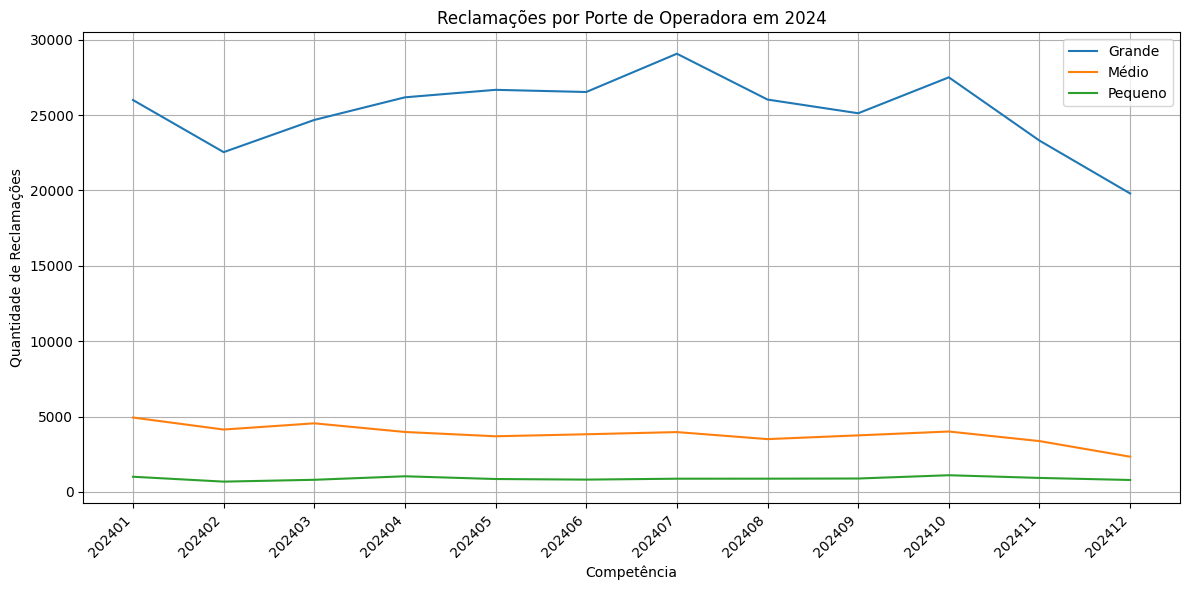

In [7]:
import matplotlib.pyplot as plt

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(competencia, df_g, label='Grande')
plt.plot(competencia, df_m, label='Médio')
plt.plot(competencia, df_p, label='Pequeno')

# Adicionando título e legendas
plt.title('Reclamações por Porte de Operadora em 2024')
plt.xlabel('Competência')
plt.ylabel('Quantidade de Reclamações')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.tight_layout() #Ajusta o layout para evitar sobreposição de elementos
plt.show()
